## Titanic Data Set Analysis

This is project no.1, a analysis of the famous Titanic Data Set. 
The data set can found here: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [1]:
'''Import statements'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns 

In [37]:
df = pd.read_csv('./titanic.csv')
df.head(100)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
96,1,1,Mr. William Bertram Greenfield,male,23.0,0,1,63.3583
97,1,2,Mrs. John T (Ada Julia Bone) Doling,female,34.0,0,1,23.0000
98,0,2,Mr. Sinai Kantor,male,34.0,1,0,26.0000


In [5]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

Shape of the dataset

In [12]:
df.shape

(887, 8)

Check for null values

In [13]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

The name of the person does not indicate, if he/ she survives. So that column can be droped. 

In [14]:
df_analysis = df.drop(["Name"], axis = 1)

## Plots of the data

Gender

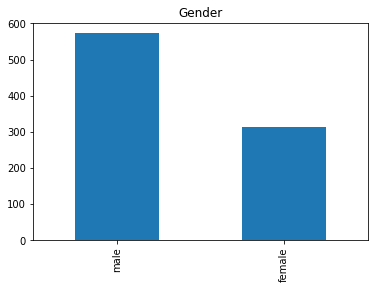

In [27]:
df_gender = df.Sex.value_counts()
(df_gender).plot(kind="bar");
plt.title("Gender");

Age

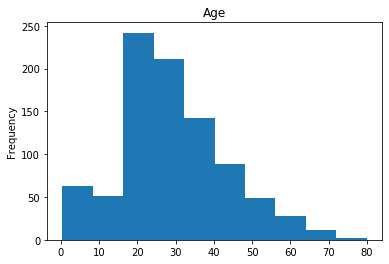

In [45]:
df_age = df.Age

df_age.plot.hist();
plt.title("Age");

Siblings/Spouses Aboard

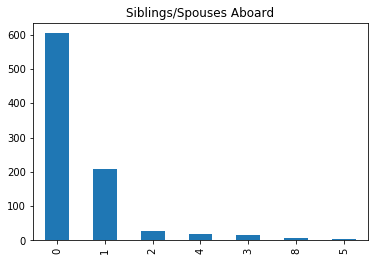

In [46]:
df_sib = df["Siblings/Spouses Aboard"].value_counts()
(df_sib).plot(kind="bar");
plt.title("Siblings/Spouses Aboard");

Parents/Children Aboard

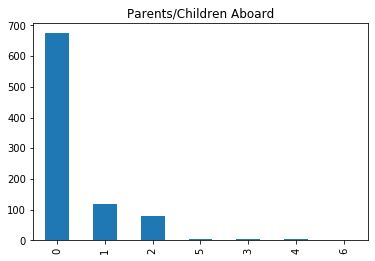

In [48]:
df_par = df["Parents/Children Aboard"].value_counts()
(df_par).plot(kind="bar");
plt.title("Parents/Children Aboard");

Fare

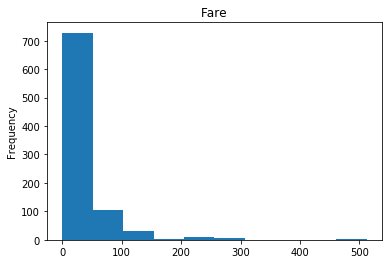

In [49]:
df_fare = df.Fare

df_fare.plot.hist();
plt.title("Fare");

Survived

In [ ]:
df_par = df["Survived"].value_counts()
(df_par).plot(kind="bar");
plt.title("survive");